In [26]:
# 4. Portrait de phase complet
function [x1,x2,x1p,x2p] = plot_portrait_phase_complete(A)

    #grid for plotting
    x1range=-1.5:.1:1.5;
    x2range=-1.5:.1:1.5;
    [x1,x2] = meshgrid(x1range, x2range);

    # Define the system to plot (based on matrix A)
    x1p = A(1,1)*x1+A(1,2)*x2;
    x2p = A(2,1)*x1+A(2,2)*x2;

    #Normalize values for plotting
    norms=sqrt(x1p.^2+x2p.^2);
    
    [eigenline_1,eigenline_2,V] = compute_eigenlines(A,x1range);
    [isocline_1,isocline_2] = compute_isoclines(A,x1range);
    
    # Vector field plot
    hold on;
    quiver(x1,x2,x1p./norms,x2p./norms,0.5);
    
    # Vecteurs propres
    plot(x1range,eigenline_1,"linewidth",2);
    plot(x1range,eigenline_2,"linewidth",2);
    
    # Isoclines
    plot(x1range,isocline_1,":","linewidth",2);
    plot(x1range,isocline_2,":","linewidth",2);
    legend("field","v_1","v_2","isocline_1","isocline_2","location","south","orientation", "horizontal");
    
endfunction

function [isocline_1,isocline_2] = compute_isoclines(A,line_range)
    isocline_1 = -(A(1,1)/A(1,2)) * line_range;
    isocline_2 = -(A(2,1)/A(2,2)) * line_range;
endfunction

function [eigenline_1,eigenline_2,V] = compute_eigenlines(A,line_range)
    [V,L] = eig(A);
    eigenline_1 = (V(2,1)/V(1,1)) * line_range;
    eigenline_2 = (V(2,2)/V(1,2)) * line_range;
endfunction


In [27]:
a = 5; b = 4


b = 4


#### Tout d'abord on a commencé avec le système 1:
$ \begin{cases} \dot{w_{(t)}} &= aw(t) + be(t) \\ \dot{e_{(t)}} &= 0 \end{cases}$

#### La matrice sera sous cette forme :
$\begin{bmatrix}\dot{x_{1}}\\
\dot{x_{2}}\end{bmatrix}=\begin{bmatrix}a_{11} & a_{12}\\
a_{21} & a_{22}\end{bmatrix}\begin{bmatrix}x_{1}\\
x_{2}\end{bmatrix}$

#### On sait aussi que $a_{21} = 0$, $a_{22} = 0$. On va donc renommer $a_{11}$ en $a$ et $a_{12}$ en $b$:
$\begin{bmatrix}\dot{x_{1}}\\
\dot{x_{2}}\end{bmatrix}=\begin{bmatrix}a & b\\
0 & 0\end{bmatrix}\begin{bmatrix}x_{1}\\
x_{2}\end{bmatrix}$

#### Le polynome caractéristique sera :
$\lambda^{2}-a*\lambda=\lambda(\lambda - a)$

#### Les valeurs propres
$ \lambda_1 = 0$ , $\lambda_2 = a$
#### Les vecteurs propres
$ \mathbf{v_1} = \begin{bmatrix} \frac{-b}{a} \\ 1 \end{bmatrix} $ , $\mathbf{v_2} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$

### Le type de système

#### Si a > 0 et b une valeur prise au hasard soit 6, alors un noeud dégénéré instable

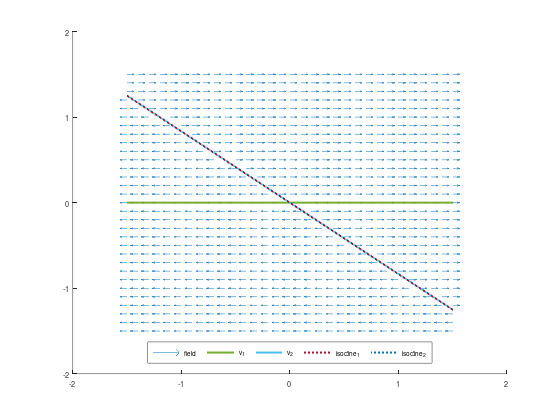

In [28]:
a = 5; b = 6;A = [a b; 0 0];[x1,x2,x1p,x2p] = plot_portrait_phase_complete(A);

#### Si a < 0 et b une valeur prise au hasard soit 6, alors un noeud dégénéré sont simplement stable

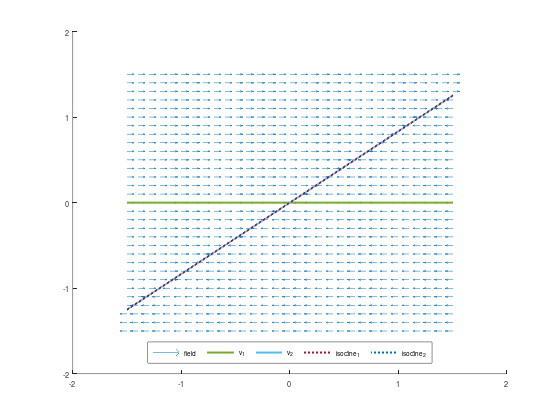

In [29]:
a = -5; b = 6;A = [a b; 0 0];[x1,x2,x1p,x2p] = plot_portrait_phase_complete(A);

#### Si a = 0 et b une valeur prise au hasard soit 6, comme la matrice est diagonalisable, on a un noeud singulier en 0

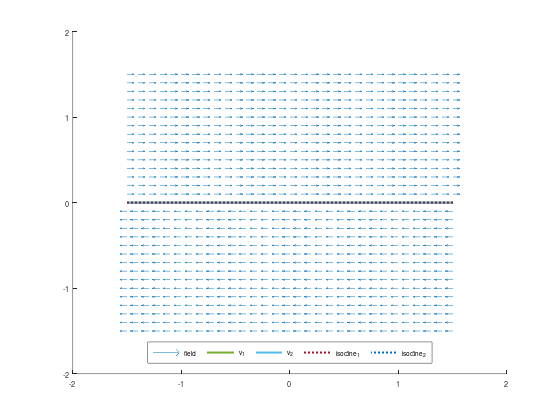

In [30]:
a = 0; b = 6;A = [a b; 0 0];[x1,x2,x1p,x2p] = plot_portrait_phase_complete(A);

#### Ensuite, pour le système 2:
$ \begin{cases} \dot{w_{(t)}} &= aw(t) + be(t) \\ \dot{e_{(t)}} &= bw(t) + ae(t) \end{cases}$

##### Nous voyons que a11 = a22, a12 = a21

#### La matrice sera sous cette forme :
$\begin{bmatrix}\dot{x_{1}}\\
\dot{x_{2}}\end{bmatrix}=\begin{bmatrix}a_{11} & a_{12}\\
a_{21} & a_{22}\end{bmatrix}\begin{bmatrix}x_{1}\\
x_{2}\end{bmatrix}$

#### On sait aussi que $a_{11} = a_{22}$ et $a_{12} = a_{21}$  donc on peut représenter la matrice comme cela :
$\begin{bmatrix}\dot{x_{1}}\\
\dot{x_{2}}\end{bmatrix}=\begin{bmatrix}a & b\\
b & a\end{bmatrix}\begin{bmatrix}x_{1}\\
x_{2}\end{bmatrix}$

#### Le polynome caractéristique sera :
$\lambda^{2}-2a*\lambda + (a^{2} -b^{2})$

#### Les valeurs propres
$ \lambda_1 = a+b $ , $\lambda_2 = a-b$
#### Les vecteurs propres
$ \mathbf{v_1} = \begin{bmatrix} -1 \\ 1 \end{bmatrix} $ , $\mathbf{v_2} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$

### Le type de système

#### Si a < -|b|, alors nous avons un noeud stable

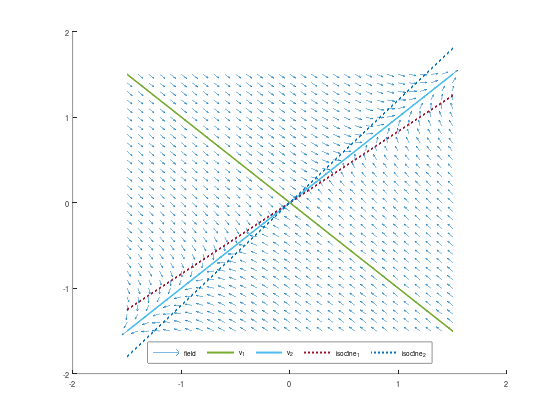

In [31]:
a = -5; b = 6;A = [a b; b a];[x1,x2,x1p,x2p] = plot_portrait_phase_complete(A);

#### Si a > |b|, alors nous avons un noeud instable

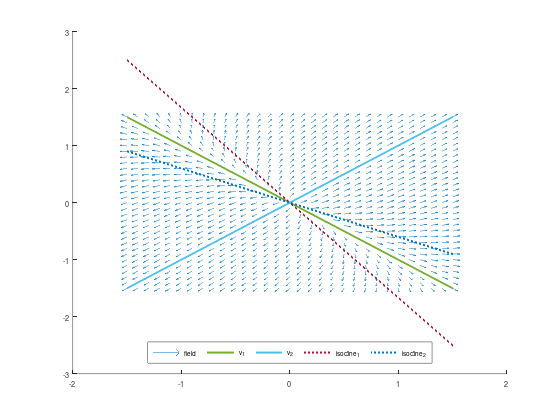

In [32]:
a = 5; b = 3;A = [a b; b a];[x1,x2,x1p,x2p] = plot_portrait_phase_complete(A);

#### Si -b < a < b, alors nous avons une selle

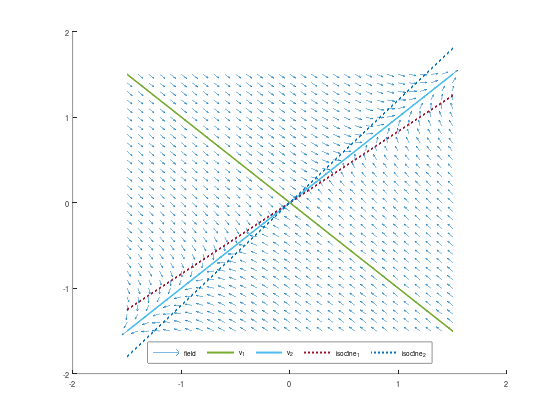

In [33]:
a = -5; b = 6;A = [a b; b a];[x1,x2,x1p,x2p] = plot_portrait_phase_complete(A);

#### Ensuite, pour le système 3:
$ \begin{cases} \dot{w_{(t)}} &= aw(t) + be(t) \\ \dot{e_{(t)}} &= -bw(t) - ae(t) \end{cases}$


#### La matrice sera sous cette forme :
$\begin{bmatrix}\dot{x_{1}}\\
\dot{x_{2}}\end{bmatrix}=\begin{bmatrix}a_{11} & a_{12}\\
a_{21} & a_{22}\end{bmatrix}\begin{bmatrix}x_{1}\\
x_{2}\end{bmatrix}$

#### On sait aussi que $a_{11} = -a_{22}$ et $a_{12} = -a_{21}$  donc on peut représenter la matrice comme cela :
$\begin{bmatrix}\dot{x_{1}}\\
\dot{x_{2}}\end{bmatrix}=\begin{bmatrix}a & b\\
-b & -a\end{bmatrix}\begin{bmatrix}x_{1}\\
x_{2}\end{bmatrix}$

#### Le polynome caractéristique sera :

## % a - l^2 = -b^2 ????

$\lambda^{2}- a^{2}+ b^{2}$

#### Les valeurs propres

##### Dans ce cas, les valeurs propres peuvent être réeles ou imaginaires

$ \lambda_1, \lambda_2 = +- \sqrt{a^{2}-b^{2}}$

#### Les vecteurs propres

$ \mathbf{v_1} = \begin{bmatrix} -\frac{a - \sqrt{a^{2} - b^{2}}}{b} \\ 1 \end{bmatrix} $ , $\mathbf{v_2} = \begin{bmatrix}  -\frac{a + \sqrt{a^{2} - b^{2}}}{b} \\ 1 \end{bmatrix}$

### Le type de système

#### Si $(a^{2} - b^{2}) > 0   <=>   a > b$ et $\lambda_1 > 0 > \lambda_2 $. Dans ce cas nous avons une celle


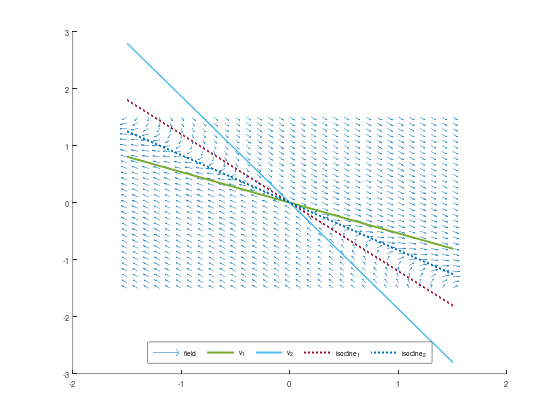

In [34]:
 a = 6; b = 5;A = [a b; -b -a];[x1,x2,x1p,x2p] = plot_portrait_phase_complete(A);

#### Si $(a^{2} - b^{2}) == 0   <=>   a = b$ et $\lambda_1 = \lambda_2 = 0 $. comme la matrice est diagonalisable, on a un noeud singulier en 0

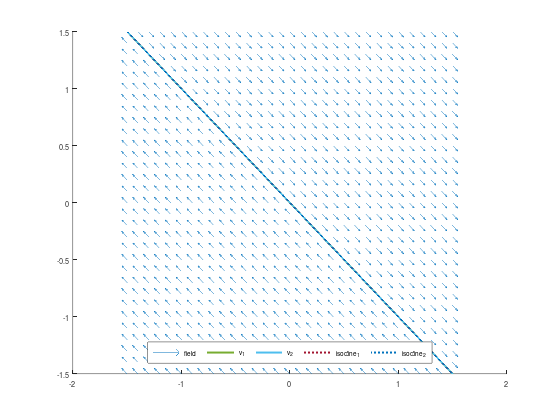

In [36]:
 a = 5; b = 5;A = [a b; -b -a];[x1,x2,x1p,x2p] = plot_portrait_phase_complete(A);

#### Si $(a^{2} - b^{2}) < 0   <=>   a < b$ et $\lambda_1 > 0 > \lambda_2 $. Dans ce cas nous avons une celle
